In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
bank = pd.read_csv("hmelq.csv")
df_bank = bank.copy()
df_bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [4]:
df_bank = df_bank.dropna()
df_bank.isnull().values.any()

False

In [5]:
df = df_bank.copy()
dms = pd.get_dummies(df_bank[['reason','job']])
dms.head()
X_ = df_bank.drop(['bad','reason','job'], axis=1).astype('float64')
X_.head()
X = pd.concat([X_, dms[['job_Mgr','reason_DebtCon','job_Office','job_ProfEx','job_Sales','job_Self']]], axis=1)
X = pd.concat([X, df[['bad']]], axis=1)
df_bank = X.copy()
df_bank

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,reason_DebtCon,job_Office,job_ProfEx,job_Sales,job_Self,bad
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,7200.0,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1,1
3546,53400.0,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1,1
3547,27300.0,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,0,1,0,0,0,1,1
3548,37300.0,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1,1


In [6]:
df_bank['bad'].value_counts()
# target değişken nasıl dağılıyor

0    1840
1     178
Name: bad, dtype: int64

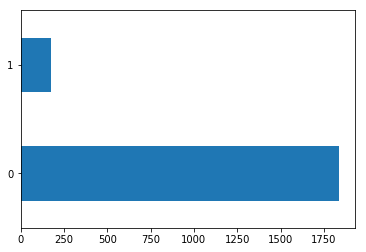

In [7]:
df_bank['bad'].value_counts().plot.barh() # h yan döndürdü
plt.show()

In [8]:
y = df_bank['bad']
X = df_bank.drop(['bad'], axis = 1)

In [9]:
loj = sm.Logit(y,X) # Logistic regression
loj_model = loj.fit() # Model kuruldu
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.255671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.1431
Time:                        11:10:01   Log-Likelihood:                -515.94
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 8.341e-29
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.932e-05   1.04e-05     -1.861      0.063   -3.97e-05    1.02e-06
mortdue        -1.385e-06   4.94e-06     -0.280      0.779   -1.11e-05     8.3e-06
value          -2.308e-06   4.18e-06     -0.553      0.580   -1.05e-05    5.88e-06
yoj               -0.0345      0.013     -2.698      0.007      -0.060      -0.009
derog              0.5416      0.126      4.314      0.000       0.296       0.788
delinq             0.7600      0.088      8.605      0.000       0.587       0.933
clage             -0.0083      0.001     -6.264      0.000      -0.011      -0.006
ninq               0.0580      0.048      1.212      0.226      -0.036       0.152
clno              -0.0413      0.011     -3.822      0.000      -0.062      -0.020
debtinc            0.0235      0.007      3.303      0.001       0.010       0.037
job_Mgr           -0.0941      0.256     -0.367      0.714      -0.597       0.409
reason_DebtCon    -0.4757      0.177     -2.690      0.007      -0.822      -0.129
job_Office        -0.6638      0.270     -2.459      0.014      -1.193      -0.135
job_ProfEx        -0.2196      0.242     -0.907      0.364      -0.694       0.255
job_Sales          1.0547      0.556      1.898      0.058      -0.035       2.144
job_Self           0.9778      0.518      1.887      0.059      -0.038       1.993
==================================================================================
"""

In [10]:
# yoj, derog, delinq, clage,  clno, debtinc, reason_DebtCon ve job_Office değişkenleri anlamlı

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") #cost function var içerde y leri tahmin ederken hangisinden ne kadar ödün vericem
                                               # gerçekten 0 olanlara ne kadar 1 dedim ya da tam tersi
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
loj_model.intercept_ # Constant (beta0)

array([-0.00221863])

In [13]:
loj_model.coef_

array([[-3.56681830e-05, -7.37565118e-06, -1.65614093e-06,
        -1.61934682e-02,  5.85731999e-03,  1.04642967e-02,
        -8.91750678e-03,  3.86857156e-03, -1.51412410e-02,
         2.78622123e-02, -7.84042301e-06, -1.49002943e-03,
        -1.16896011e-03, -5.94957787e-04,  3.30337914e-04,
         4.01154983e-04]])

In [14]:
y_pred = loj_model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
cf = confusion_matrix(y, y_pred)
cf
# 1840 0 var -> 2013 tahmin etmişim -> 1835 i doğru 178 i yanlış
# 178 1 var -> 5 tahmin etmişim -> 0 si doğtu 5 si yanlış

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [16]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [17]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
loj_model.predict_proba(X)[0:10] 

array([[0.92514953, 0.07485047],
       [0.80254493, 0.19745507],
       [0.96300638, 0.03699362],
       [0.83174508, 0.16825492],
       [0.81525311, 0.18474689],
       [0.98284698, 0.01715302],
       [0.84196367, 0.15803633],
       [0.95886326, 0.04113674],
       [0.75519964, 0.24480036],
       [0.96080894, 0.03919106]])

In [19]:
y[0:10]

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [20]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.06243398, 0.1887888 , 0.01248744, 0.166166  , 0.18403102,
       0.01486474, 0.14424831, 0.03561566, 0.25138618, 0.03880015])

In [21]:
y_pred = [1 if i>0.45 else 0 for i in y_probs]
y_pred[0:10] #0.4 threshold ile daha iyi sonuç veriyor

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
cf_new = confusion_matrix(y, y_pred)
cf_new

array([[1832,    8],
       [ 175,    3]], dtype=int64)

In [23]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.27      0.02      0.03       178

    accuracy                           0.91      2018
   macro avg       0.59      0.51      0.49      2018
weighted avg       0.86      0.91      0.87      2018



In [24]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.06243398, 0.1887888 , 0.01248744, 0.166166  , 0.18403102])

In [25]:
logit_roc_auc_1 = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc_1 # 0.5 threshold

0.4986413043478261

In [26]:
logit_roc_auc_2 = roc_auc_score(y, y_pred)
logit_roc_auc_2 # 0.4 threshold

0.5062530532486565

In [27]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1]) # xlerin 1 olma ihtimalini bu thresholdlara göre hesapla
print(fpr[0:10]) # false positive rate
print(tpr[0:10]) # true positive rate
print(thresholds[0:10]) 

[0.         0.00054348 0.00271739 0.00271739 0.00380435 0.00380435
 0.00434783 0.00434783 0.0048913  0.0048913 ]
[0.         0.         0.         0.00561798 0.00561798 0.01685393
 0.01685393 0.02247191 0.02247191 0.03932584]
[1.5408853  0.5408853  0.52877008 0.49252315 0.47426989 0.46817383
 0.46534378 0.44717334 0.43401338 0.39865319]


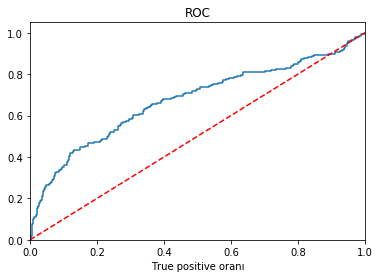

In [28]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area=%0.2f)' %logit_roc_auc_1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive oranı')
plt.xlabel('True positive oranı')
plt.title("ROC")
plt.show()

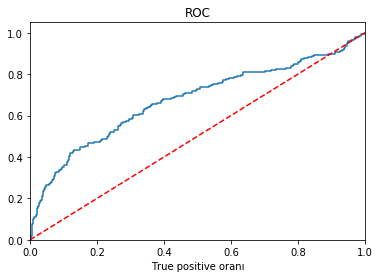

In [29]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area=%0.2f)' %logit_roc_auc_2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive oranı')
plt.xlabel('True positive oranı')
plt.title("ROC")
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.10, random_state=42)

In [77]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
loj_model.predict(X_test)[0:10]
loj_model.predict_proba(X_test)[0:10] 
y[0:10]

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [79]:
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.05249595, 0.04909673, 0.07712179, 0.02453518, 0.169898  ,
       0.24524828, 0.20389002, 0.04765628, 0.00483684, 0.06099617])

In [80]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9108910891089109

In [81]:
cross_val_score(loj_model, X_test, y_test,cv=10).mean()

0.9309022556390978

In [82]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.27      0.02      0.03       178

    accuracy                           0.91      2018
   macro avg       0.59      0.51      0.49      2018
weighted avg       0.86      0.91      0.87      2018



In [83]:
logit_roc_auc_3 = roc_auc_score(y_test, loj_model.predict(X_test))
logit_roc_auc_3 # 0.5 threshold

0.5

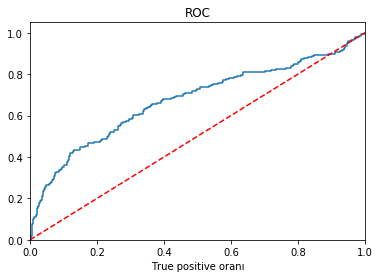

In [84]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area=%0.2f)' %logit_roc_auc_3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive oranı')
plt.xlabel('True positive oranı')
plt.title("ROC")
plt.show()